<a href="https://colab.research.google.com/github/gajayi2023/DATA201/blob/main/Copy_of_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project (Logistic Regression)



# Introduction


Adult Census Income  is a dataset from Kaggle that was extracted in 1994 from the Census Burean Database by Ronny Kohavi and Barry Becker.


# *Dataset Features*


Age : The length of time that a person has lived. Discrete (from 17 to 90)

Workclass: Private, Self-emp-not-inc, Local-gov, Federal-gov, State-gov, without-pay, never-worked

Fnlwgt: Final weight(continuous). The number of people the census believes the entry represents.

Education: The highest level of education such as Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

Education-num: The number of years of education

Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, 

Marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
  List item

Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

Sex: Female, Male

Capital-gain: continuous

Capital-loss: continuous

Hours-per-week: continuous(1 to 99)

Native-country: (42 countries) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Salary: >50K,<=50K
























In [72]:
#Importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn import model_selection,preprocessing,linear_model,metrics


In [73]:
df = pd.read_csv('adult.csv')

# Exploratory Data Analysis

In [74]:
#  Data Type
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [75]:
## See the shape of the dataset
print(df.shape)
df.describe(include ="all")

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [76]:
# the first and the last rows of the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [77]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [79]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [80]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [81]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [82]:
#Encoding income column
df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

In [83]:
#Checking duplicated rows
df.duplicated()

1        False
3        False
4        False
5        False
6        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 30162, dtype: bool

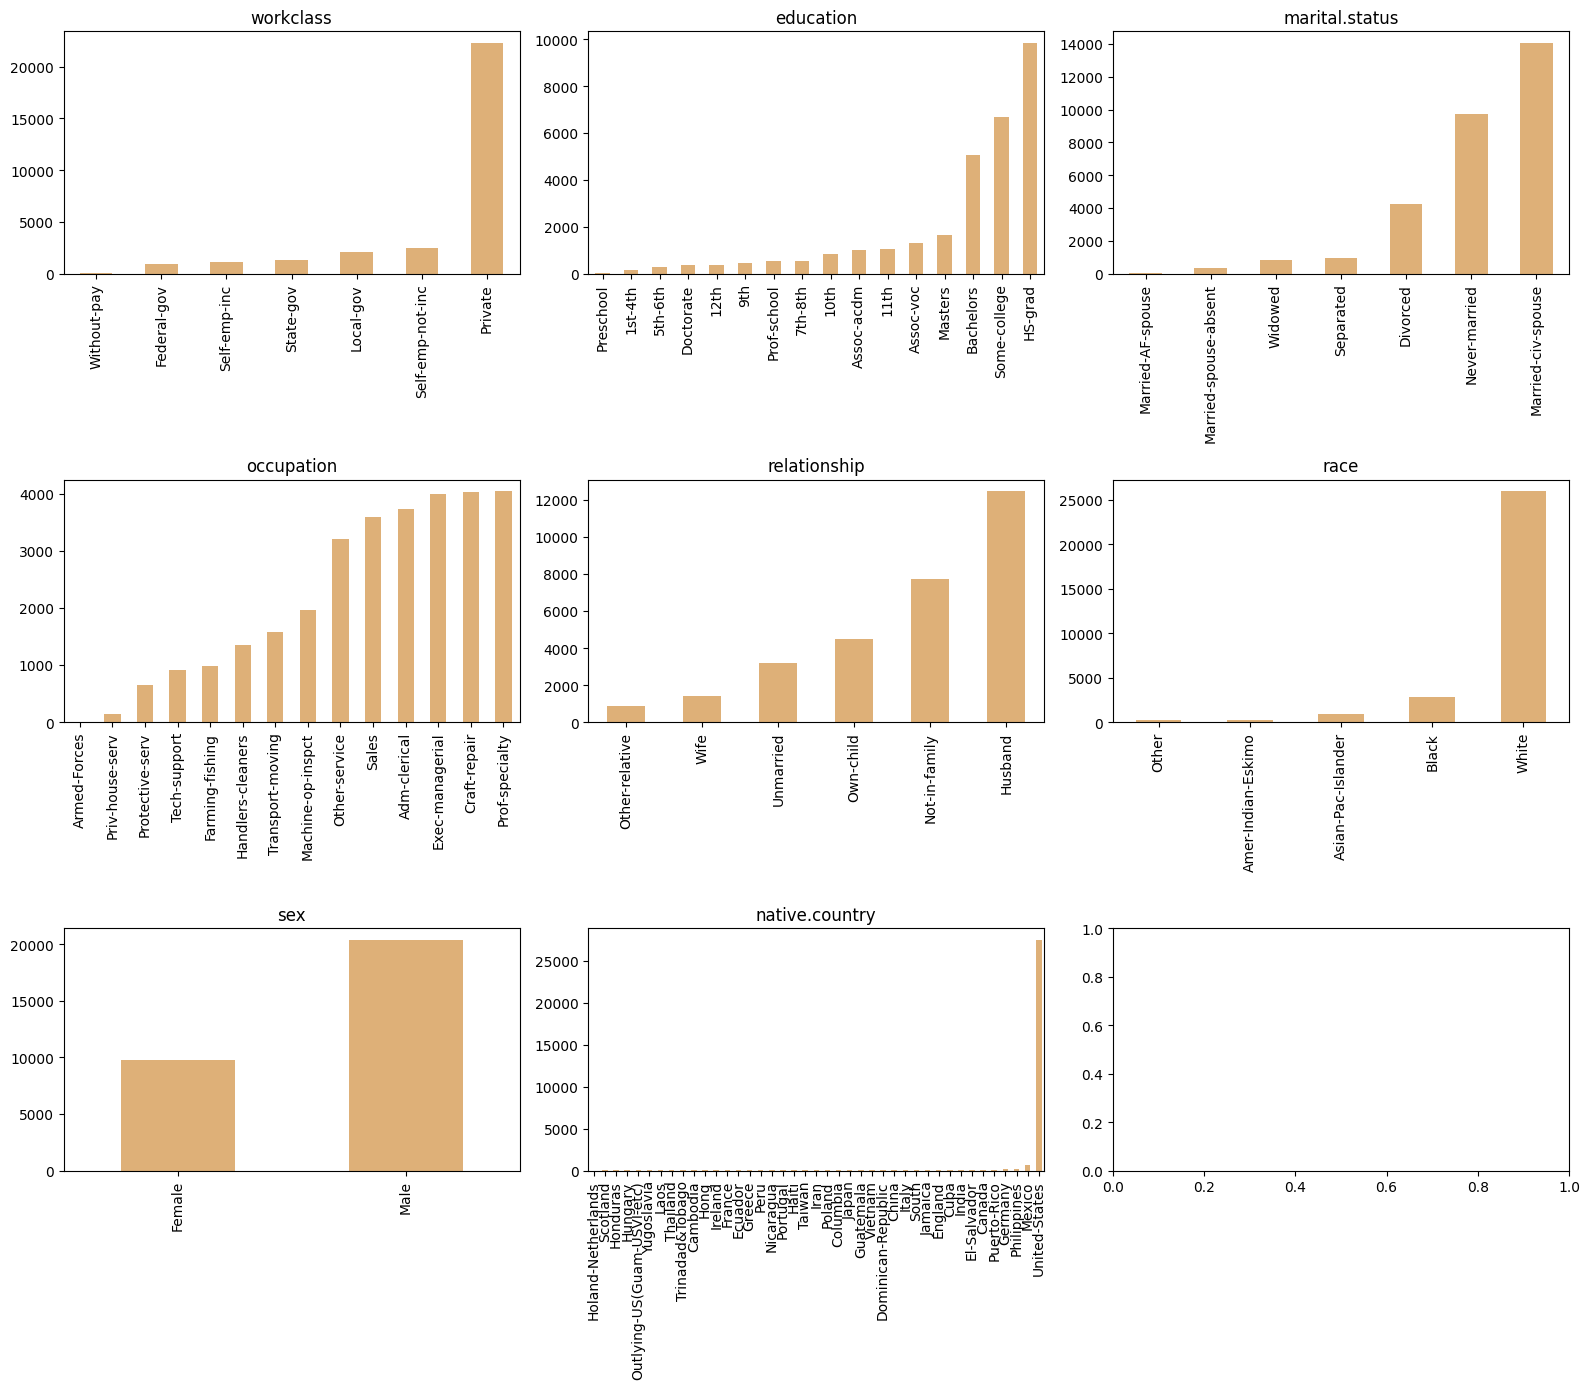

In [84]:
#Visualization of Categorical Variables
fields=df.select_dtypes(exclude="number").columns

figuresize=(16,14)
cols=3
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    df[fields[i-1]].value_counts().sort_values().plot.bar(color='#DEB078')  
    plt.xticks(rotation=90)
    plt.title(fields[i-1])
    
plt.tight_layout()
plt.show()

# Descriptive Statistics and Visualization







In [85]:
# Shows the maximum value of all columns
df.max(skipna = True, numeric_only = True)

age                    90
fnlwgt            1484705
education.num          16
capital.gain        99999
capital.loss         4356
hours.per.week         99
income                  1
dtype: int64

In [86]:
# Shows the average value of all columns
df.mean(skipna = True, numeric_only = True)

age                   38.437902
fnlwgt            189793.833930
education.num         10.121312
capital.gain        1092.007858
capital.loss          88.372489
hours.per.week        40.931238
income                 0.248922
dtype: float64

In [87]:
# Shows the minimum value of all columns
df.min(skipna = True, numeric_only = True)

age                  17
fnlwgt            13769
education.num         1
capital.gain          0
capital.loss          0
hours.per.week        1
income                0
dtype: int64

In [88]:
# Shows the mode of all numeric columns
df.mode(numeric_only = True)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,36,203488,9,0,0,40,0


In [89]:
# Number of eduaction
df.groupby(['education'])['education'].count()

education
10th             820
11th            1048
12th             377
1st-4th          151
5th-6th          288
7th-8th          557
9th              455
Assoc-acdm      1008
Assoc-voc       1307
Bachelors       5044
Doctorate        375
HS-grad         9840
Masters         1627
Preschool         45
Prof-school      542
Some-college    6678
Name: education, dtype: int64

In [90]:
df.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min    25%   50%  \
race               sex                                                        
Amer-Indian-Eskimo Female    107.0  37.252336  12.933862  17.0  28.00  37.0   
                   Male      179.0  36.430168  10.802589  17.0  28.00  35.0   
Asian-Pac-Islander Female    294.0  35.363946  11.819758  17.0  25.25  34.0   
                   Male      601.0  39.156406  12.772451  18.0  29.00  37.0   
Black              Female   1399.0  38.042888  12.320976  17.0  28.00  37.0   
                   Male     1418.0  37.681241  12.516296  17.0  28.00  36.0   
Other              Female     87.0  31.908046  10.216986  17.0  24.00  29.0   
                   Male      144.0  34.625000  11.280204  17.0  26.00  32.0   
White              Female   7895.0  36.784421  13.814467  17.0  25.00  35.0   
                   Male    18038.0  39.366781  12.918661  17.0  29.00  38.0   

                            75%   max  
race               sex                 
Amer-Indian-Eskimo Female  46.0  80.0  
                   Male    44.0  71.0  
Asian-Pac-Islander Female  44.0  75.0  
                   Male    47.0  90.0  
Black              Female  46.0  90.0  
                   Male    46.0  90.0  
Other              Female  39.5  58.0  
                   Male    42.0  77.0  
White              Female  46.0  90.0  
                   Male    48.0  90.0

In [91]:
#Maximum number of hours a person works per week
df['hours.per.week'].describe()

count    30162.000000
mean        40.931238
std         11.979984
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [92]:
df.groupby(['native.country'])['hours.per.week'].mean()

native.country
Cambodia                      40.944444
Canada                        41.476636
China                         38.647059
Columbia                      39.642857
Cuba                          39.728261
Dominican-Republic            42.283582
Ecuador                       40.222222
El-Salvador                   37.000000
England                       42.476744
France                        46.370370
Germany                       41.757812
Greece                        44.241379
Guatemala                     39.222222
Haiti                         37.166667
Holand-Netherlands            40.000000
Honduras                      37.916667
Hong                          40.947368
Hungary                       35.615385
India                         41.530000
Iran                          44.071429
Ireland                       42.416667
Italy                         42.220588
Jamaica                       38.575000
Japan                         43.966102
Laos                     

In [93]:
df['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [94]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [95]:
#Number of female / male
nb_female = (df.sex == 'Female').astype('int').sum()
nb_male = (df.sex == 'Male').astype('int').sum()
nb_female, nb_male


print("Within our dataset, we have {} males and {} females.".format(nb_male, nb_female))
print("To normalize, males take up {:,.2f}% and females take up {:,.2f}% percent of the whole.".format(100*nb_male/df["sex"].count(),100*nb_female/df["sex"].count()))


Within our dataset, we have 20380 males and 9782 females.
To normalize, males take up 67.57% and females take up 32.43% percent of the whole.


In [96]:
#Multi-variable Frequencies (sex and income)
pd.crosstab(df["sex"], df["income"], margins = True)

income,0,1,All
sex,,,
Female,8670,1112,9782
Male,13984,6396,20380
All,22654,7508,30162


In [97]:
## Percentage of people who earn less than 50K and more than 50K
df[['income']].value_counts(normalize=True).round(decimals=3)*100


income
0         75.1
1         24.9
dtype: float64

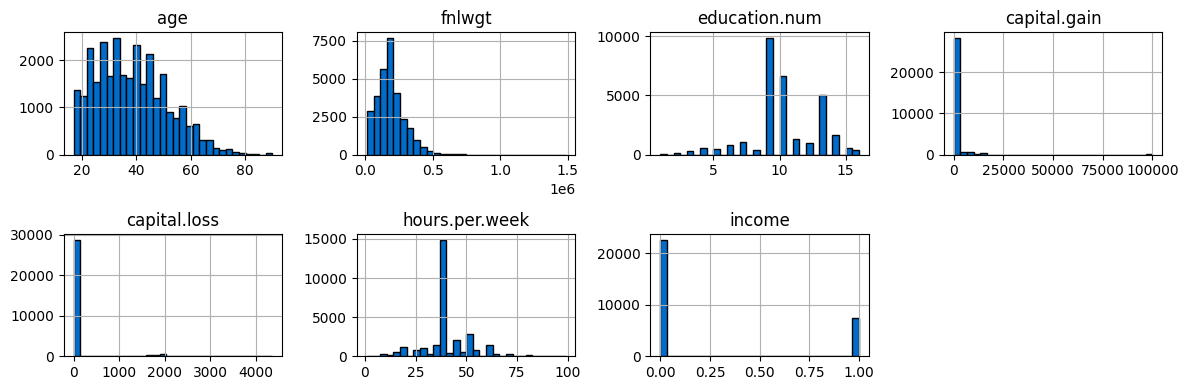

In [98]:
#Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,4)
layout_val=(-1, 4)
df.hist(bins=30, figsize=figsize_val, layout=layout_val, edgecolor="black",color='#016CC9')
plt.tight_layout();

<Axes: xlabel='income'>

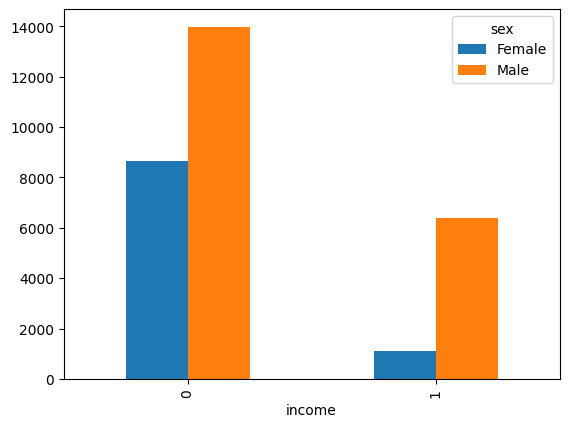

In [99]:
#Checking male and female ration according to their salary
class_sex = pd.crosstab(df['income'],df['sex'])
class_sex.plot(kind='bar')

<Axes: xlabel='education'>

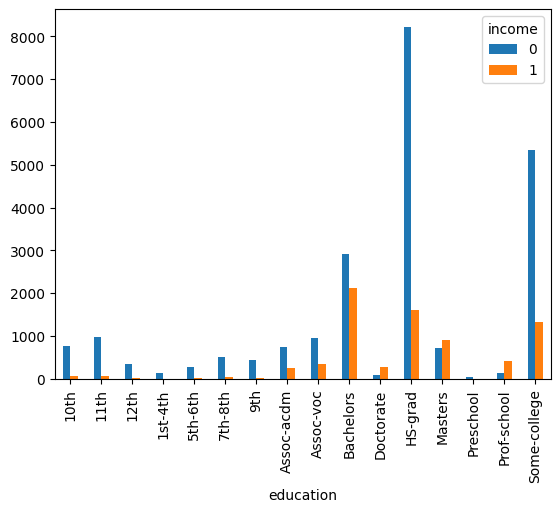

In [100]:
#Checking distribution of people according to salary
salary_education = pd.crosstab(df['education'],df['income'])
salary_education.plot(kind='bar')

In [101]:
# Multi-variable Frequencies (Income and Native Country)
pd.crosstab(df["income"], df["native.country"], margins = True)

native.country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,All
income,,,,,,,,,,,,,,,,,,,,,
0,11,71,48,54,67,65,23,91,56,15,...,97,9,57,23,14,16,20509,59,10,22654
1,7,36,20,2,25,2,4,9,30,12,...,12,2,14,19,3,2,6995,5,6,7508
All,18,107,68,56,92,67,27,100,86,27,...,109,11,71,42,17,18,27504,64,16,30162


In [102]:
df.skew()

<ipython-input-102-9e0b1e29546f>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



age                0.530228
fnlwgt             1.459220
education.num     -0.305379
capital.gain      11.902682
capital.loss       4.526380
hours.per.week     0.330869
income             1.161408
dtype: float64

In [103]:
df.select_dtypes(exclude='number').columns[:-1]

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object')

In [104]:
# Correlation Plot
fig = px.imshow(df.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#016CC9','#DEB078'])
fig.show()

<ipython-input-104-eecf55062d4b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Logistic Regression
**Predict Whether a given adult's income will be >50 K or not**

Use scikit-learn logistic regression to train, test and predict a categorical target variable. Use appropriate metric and interpret the meaning of the score

In [105]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [106]:
#Spliting the dataset into independent variable (X) and dependent varibale (Y)
X = df.drop(['income', 'native.country'], axis=1)
y = df['income']

#Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


#Preparing the dataset to make it suitable for the machine learning model
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        label = preprocessing.LabelEncoder()
        X_train[feature] = label.fit_transform(X_train[feature])
        X_test[feature] = label.transform(X_test[feature])

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)







In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test) #Prediction on Testing the data
accuracy_score(y_test, y_pred) #The accauracy of the test


0.820321564727333

In [108]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']

#Spliting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


#Preparing the dataset to make it suitable for the machine learning model
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        label = preprocessing.LabelEncoder()
        X_train[feature] = label.fit_transform(X_train[feature])
        X_test[feature] = label.transform(X_test[feature])

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test) #Prediction on Testing the data
accuracy_score(y_test, y_pred) #The accauracy of the test


0.817503729487817

In [110]:
print('Classes', LR.classes_)
print('Intercept',LR.intercept_)
print("Coefficients", LR.coef_ )


Classes [0 1]
Intercept [-1.40748759]
Coefficients [[ 0.43037679 -0.09736404  0.03680127  0.06133217  0.88468126 -0.39212098
   0.01340379 -0.24768748  0.11047193  0.46351314  2.28502459  0.27345621]]


In [111]:
print("Accuracy", LR.score(X_test, y_test))
print(classification_report(y_test, LR.predict(X_test)))

Accuracy 0.817503729487817
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4529
           1       0.72      0.44      0.54      1504

    accuracy                           0.82      6033
   macro avg       0.78      0.69      0.72      6033
weighted avg       0.81      0.82      0.80      6033



In [112]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[4274,  255],
       [ 846,  658]])

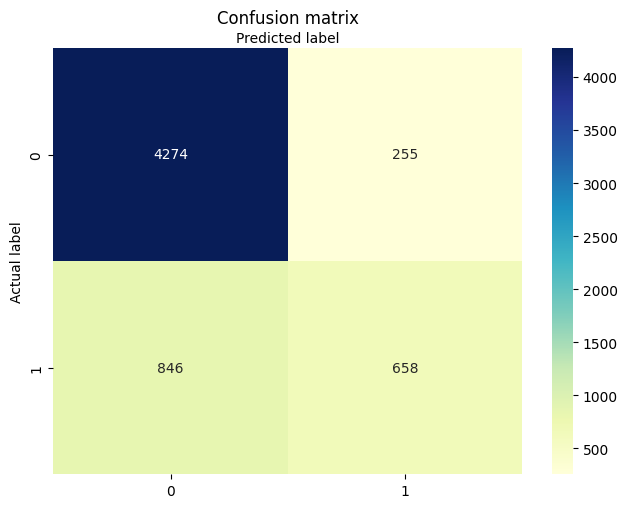

In [113]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
#create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
display_labels = [False, True]

In [114]:
#Dummy classifier in SKlearn
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

In [115]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.817503729487817
Precision: 0.7207009857612268
Recall: 0.4375


# Predict the class probability of the test data 

In [116]:
#Make prediction with predict_proba()
y_pred_proba = LR.predict_proba(X_test)[:,1]

In [123]:


#class probability
print(y_pred_proba)

#class of test data
y_pred_class=np.argmax(LR.predict(X_test))
print(y_pred_class)

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prediction of Class Probability of the Test Data')
plt.legend(loc="lower right")
plt.show()

AttributeError: ignored

#Compare one versus all and one versus one

In [118]:
#code for comparison
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

#one versus all
ovrc = OneVsRestClassifier(LR).fit(X_train, y_train)
y_pred=ovrc.predict(X_test)
accuracy_ovrc=accuracy_score(y_test,y_pred)
print(f'Accuracy achieved by using one versus all: {accuracy_ovrc:.3f}')
print(f"Classification Report : \n\n{classification_report(y_test, y_pred)}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

Accuracy achieved by using one versus all: 0.818
Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4529
           1       0.72      0.44      0.54      1504

    accuracy                           0.82      6033
   macro avg       0.78      0.69      0.72      6033
weighted avg       0.81      0.82      0.80      6033



In [119]:
#one versus one
ovoc = OneVsOneClassifier(SVC()).fit(X_train, y_train)
y_pred2 = ovoc.predict(X_test)
accuracy_ovoc=accuracy_score(y_test,y_pred2)
print(f'Accuracy achieved by using one versus one: {accuracy_ovoc:.3f}')
print(f"Classification Report : \n\n{classification_report(y_test, y_pred2)}")

Accuracy achieved by using one versus one: 0.839
Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4529
           1       0.74      0.54      0.63      1504

    accuracy                           0.84      6033
   macro avg       0.80      0.74      0.76      6033
weighted avg       0.83      0.84      0.83      6033



# Interpret the result of the logistic regression prediction 

The model shows 82% accuracy which is generally considered good. However, the model also shows that when it predicts that an adult makes less than 50K, they indeed make less than 50K around 73% of the time (precision), and the model is only able to identify people who make less than 50K less in the test dataset around 44% of the time (recall).

Using the One-vs-Rest method gives 81.8% accuracy. The precision is 72% and recall is 44%.  With the One-vs-One method gives 84.9% accuracy, the precision is 74%, and the recall is 54%. Based on the results, One-vs-One method is the best model. 



